In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pylab as plt

Prepare funciones en Python que generen dataframes panda ( de longitud dada n ) de acuerdo a las siguientes descripciones:

a) Los datos tienen d inputs, todos valores reales, correspondientes a la posición del punto en un espacio d-dimensional. El output es binario, y corresponde a la clase a la que pertenece el ejemplo. La clase 1 corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el ( 1, 1, 1, .... , 1 ) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d). La clase 0 tiene la misma distribución, pero centrada en el ( -1, -1, -1, .... , -1 ). Se puede encontrar información sobre Gaussianas multidimensionales y el caso especial de una matriz diagonal en http://cs229.stanford.edu/section/gaussians.pdf (secciones 1 y 3). Los parámetros que se deben ingresar a la función son d y n (enteros) y C (real). De los n puntos generados, n/2 deben pertenecer a cada clase.

In [2]:
def gausiandist(d,n,C):
    
    center1 = np.ones(d)
    mcov1   = np.eye(d)*C*np.sqrt(d)
    
    center2 = np.ones(d)*-1
    mcov2   = np.eye(d)*C*np.sqrt(d)
    
    points1 = np.random.multivariate_normal(center1, mcov1, int(n/2))
    points2 = np.random.multivariate_normal(center2, mcov2, int(n/2))
    
    class1 = np.ones(int(n/2))
    class2 = np.ones(int(n/2))*0
    
    clases = np.concatenate([class1,class2])
    
    points = np.concatenate([points1,points2])
    df = pd.DataFrame(points)
    
    df['clases'] = clases.astype(int)

    return df

In [3]:
dimen = 2
ndata = 200
C     = 0.75
dist = gausiandist(dimen,ndata,C)


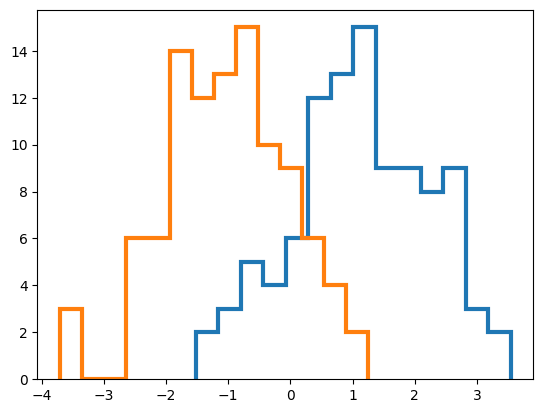

In [4]:
clase1 = dist.loc[dist['clases'] == 1]
clase0 = dist.loc[dist['clases'] == 0]

bines = int(np.sqrt(ndata))

plt.hist(clase1[1],bins=bines,histtype='step',lw=3)
plt.hist(clase0[1],bins=bines,histtype='step',lw=3)
plt.show()

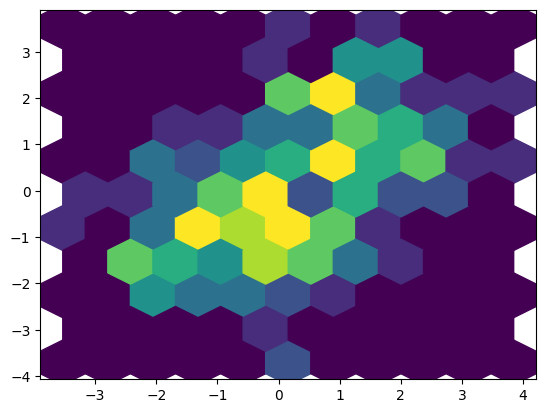

In [5]:
plt.hexbin(dist.values[:,0],dist.values[:,1],gridsize=10)

In [6]:
clase1 = dist.loc[dist['clases'] == 1]

np.cov((clase1.values[:,0],clase1.values[:,1]))

array([[0.97345556, 0.06035138],
       [0.06035138, 1.20693883]])

In [7]:
dimen = 4
ndata = 2000
C     = 2
dist = gausiandist(dimen,ndata,C)
print(C*np.sqrt(dimen))

4.0


In [8]:
clase1 = dist.loc[dist['clases'] == 1]

np.cov((clase1.values[:,0],clase1.values[:,1],clase1.values[:,2],clase1.values[:,3]))

array([[ 4.08050057, -0.0839147 , -0.07445144, -0.03292619],
       [-0.0839147 ,  4.0912712 ,  0.18910755, -0.06385579],
       [-0.07445144,  0.18910755,  3.64202429, -0.02186207],
       [-0.03292619, -0.06385579, -0.02186207,  4.05050925]])

b) Igual al punto anterior, pero las distribuciones tienen centro en el ( 1, 0, 0, .... , 0 ) y en el ( -1, 0, 0, .... , 0 ), respectivamente y la desviación estandar es igual a C independientemente de d.

In [9]:
def gausiandist(d,n,C):
    
    center1 = np.zeros(d)
    center1[0] = 1
    mcov1   = np.eye(d)*C
    
    
    center2 = np.zeros(d)
    center2[0] = -1
    mcov2   = np.eye(d)*C
    
    points1 = np.random.multivariate_normal(center1, mcov1, int(n/2))
    points2 = np.random.multivariate_normal(center2, mcov2, int(n/2))
    
    points = np.concatenate([points1,points2])
    df = pd.DataFrame(points)
    
    class1 = np.ones(int(n/2))
    class2 = np.ones(int(n/2))*0
    
    clases = np.concatenate([class1,class2])
    df['clases'] = clases.astype(int)


    return df

In [18]:
dimen = 2
ndata = 20000
C     = 0.75
dist = gausiandist(dimen,ndata,C)
plt.hexbin(dist.values[:,0],dist.values[:,1],gridsize=30)

c) Espirales anidadas: Los datos tienen 2 inputs, x e y, que corresponden a puntos generados al azar con una distribución UNIFORME (en dicho sistema de referencia x-y) dentro de un circulo de radio 1. El output es binario, correspondiendo la clase 0 a los puntos que se encuentran entre las curvas ro = theta/4pi y ro = (theta + pi)/4pi (en polares) y la clase 1 al resto. De los n puntos generados, n/2 deben pertenecer a cada clase. La siguiente figura es un ejemplo:

In [11]:
def espirales_anidadas(n):

    r2    = np.random.uniform(0, 1, n)
    r = np.sqrt(r2)
    tita = np.random.uniform(-2*np.pi, 4*np.pi, n)
    x = r * np.cos(tita)
    y = r * np.sin(tita)
    
  
    
    sel, = np.where((r > tita/(4*np.pi)) & (r < (tita + np.pi)/(4*np.pi)))
    
    # ---- esto es una chanchada ...
    sel2, = np.where((r > (tita+2*np.pi)/(4*np.pi)) & (r < ((tita+2*np.pi) + np.pi)/(4*np.pi)))
    sel3, = np.where((r > (tita+4*np.pi)/(4*np.pi)) & (r < ((tita+4*np.pi) + np.pi)/(4*np.pi)))
    sel4, = np.where((r > (tita-2*np.pi)/(4*np.pi)) & (r < ((tita-2*np.pi) + np.pi)/(4*np.pi)))
    sel5, = np.where((r > (tita-4*np.pi)/(4*np.pi)) & (r < ((tita-4*np.pi) + np.pi)/(4*np.pi)))
    
    sel = np.concatenate([sel,sel2,sel3,sel4,sel5])
    # ------------------------------
    
    clases = np.ones(n)
    clases[sel] = 0
    
    df = pd.DataFrame({'x' : x, 'y' : y, 'r' : r, 'tita' : tita})
    df['clases'] = clases.astype(int)
    
    return df #x[sel],y[sel]

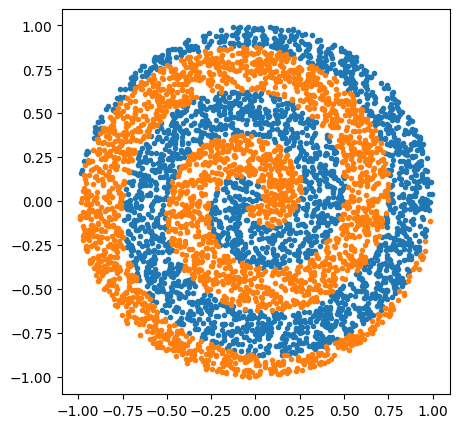

In [12]:
plt.figure(figsize=(5,5))

df = espirales_anidadas(5000)
clase1 = df.loc[df['clases'] == 1]
clase0 = df.loc[df['clases'] == 0]

plt.plot(clase1['x'],clase1['y'],ls='none',marker='o', markersize=3)
plt.plot(clase0['x'],clase0['y'],ls='none',marker='o', markersize=3)